# K콘텐츠와 외국인 관광객 사이의 상관관계 분석

## 팀

이재민 : 팀장, 발표, 자료 수집, 데이터 전처리, 데이터 시각화

유병철 : 보고서 작성, 자료 수집, 데이터 전처리, 데이터 시각화

이애정 : 자료 수집, 데이터 전처리, 데이터 시각화


## 목차

1.주제 선정 목적

2.데이터 전처리

3.데이터 시각화

4.결론

## 1. 목적

저희의 연구 목적은 방한여행객 수의 증가 원인을 탐색하는 것입니다.

 특히, 최근 OTT 사업의 급격한 확장이 우리나라의 컨텐츠를 전세계에 소개하는 기회를 제공했고,

이로 인해 방한여행 수요가 늘어났을 가능성이 있습니다

. 이에 따라 K-컨텐츠와 방한여행 간의 상관관계를 조사하여,

두 변수 간의 연관성을 분석하고 방한여행 산업의 발전을 위한 대처방안을 모색하고자 합니다.


## 2. 데이터 전처리

1.데이터 수집하기

2.라이브러리 불러오기

2.수집한 데이터를 형식에 맞추어 불러오기

3.불러온 데이터끼리 형식을 맞춰주기

### 데이터 출처

https://www.kf.or.kr/koreanstudies/koreaStudiesMap.do

KF통계센터  -  동호회 관련 정보

https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do

한국관광 데이터랩  -  입국자 데이터, 방한여행 관심도 데이터, 소비의향 데이터

### 데이터 전처리

#### 라이브러리 추가하고 데이터 불러오기

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# 한글 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
rc('font', family=font_name)
import pickle
import streamlit as st
from tmdbv3api import Movie, TMDb


In [4]:
entrance_data = pd.read_excel('entrance.xls')
entrance_data_merge = pd.read_excel('entrance_data_merge.xls')
japan_Consumption = pd.read_csv('Japan_preference.csv', encoding='EUC-KR')
china_Consumption = pd.read_csv('China_preference.csv', encoding='EUC-KR')
usa_Consumption = pd.read_csv('USA_preference.csv', encoding='EUC-KR')
tiwan_Consumption = pd.read_csv('Tiwan_preference.csv', encoding='EUC-KR')
vietnam_Consumption = pd.read_csv('Veitnam_preference.csv', encoding='EUC-KR')
world = pd.read_excel('world.xlsx')
vietnam_club = pd.read_excel('vietnam.xlsx')
usa_club = pd.read_excel('usa.xlsx')
china_club = pd.read_excel('china.xlsx')
japan_club = pd.read_excel('japan.xlsx')
tiwan_club = pd.read_excel('tiwan.xlsx')
encodings = ['utf-8', 'euc-kr', 'cp949']
Entrants_by_country = pd.read_csv('Entrants_by_country.csv', encoding='euc-kr')
preference_data_merge = pd.read_csv('preference_data_merge.csv', encoding='euc-kr')
preference_data = pd.read_csv('want_come.csv', encoding='euc-kr')
file_path = "total.xls"  # 파일 경로와 이름을 알맞게 수정해주세요.
total = pd.read_excel(file_path)
df_world = pd.read_excel('world.xlsx')
excel_file = pd.ExcelFile('year_statistics.xlsx')
# csv  파일 가져오기
interest = pd.read_csv('interest.csv')
Entrance = pd.read_csv('Entrance.csv')
Entrance_month = pd.read_csv('Entrance_month.csv')
sheet_name = '관광수입'  # 원하는 시트의 이름 또는 인덱스 지정
year_statistics = pd.read_excel(excel_file, sheet_name=sheet_name)

c:\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


#### 데이터 전처리

In [5]:
entrance_data['년도'] = pd.to_numeric(entrance_data['년도'], errors='coerce').astype(int)
preference_data['년도'] = preference_data['년도'].astype(str)
data1 = entrance_data_merge
data2 = preference_data_merge
m_sample1 = pd.DataFrame(data1)
m_sample2 = pd.DataFrame(data2)
merged_df = pd.concat([m_sample1, m_sample2], axis=1)
Entrants_by_country = Entrants_by_country[(Entrants_by_country['국적지역'] == '타이완')|(Entrants_by_country['국적지역'] == '베트남')|(Entrants_by_country['국적지역'] == '일본')|(Entrants_by_country['국적지역'] == '미국')|(Entrants_by_country['국적지역'] == '중국')]
Entrants_by_country = Entrants_by_country[(Entrants_by_country['년'] == 2019)|(Entrants_by_country['년'] == 2020)|(Entrants_by_country['년'] == 2021)|(Entrants_by_country['년'] == 2022)]

tiwan_Entrants = Entrants_by_country[Entrants_by_country['국적지역'] == '타이완']
vietnam_Entrants = Entrants_by_country[Entrants_by_country['국적지역'] == '베트남']
japan_Entrants = Entrants_by_country[Entrants_by_country['국적지역'] == '일본']
usa_Entrants = Entrants_by_country[Entrants_by_country['국적지역'] == '미국']
china_Entrants = Entrants_by_country[Entrants_by_country['국적지역'] == '중국']

world = world.drop(columns=(['동호회명','홈페이지','세부 활동현황']))
world = world[(world['국가명'] == '대만')|(world['국가명'] == '베트남')|(world['국가명'] == '일본')|(world['국가명'] == '미국')|(world['국가명'] == '중국')]
world = world[(world['연도'] == 2019)|(world['연도'] == 2020)|(world['연도'] == 2021)|(world['연도'] == 2022)]
world = world.groupby(['연도','국가명']).sum().reset_index()
world['연도'] = world['연도'].astype(str)

tiwan = world[world['국가명'] == '대만']
vietnam = world[world['국가명'] == '베트남']
japan = world[world['국가명'] == '일본']
usa = world[world['국가명'] == '미국']
china = world[world['국가명'] == '중국']

tiwan_Consumption_pix = tiwan_Consumption[(tiwan_Consumption['기준연도'] == 2019)|(tiwan_Consumption['기준연도'] == 2020)|(tiwan_Consumption['기준연도'] == 2021)|(tiwan_Consumption['기준연도'] == 2022)]
vietnam_Consumption_pix =vietnam_Consumption
japan_Consumption_pix = japan_Consumption[(japan_Consumption['기준연도'] == 2019)|(japan_Consumption['기준연도'] == 2020)|(japan_Consumption['기준연도'] == 2021)|(japan_Consumption['기준연도'] == 2022)]
usa_Consumption_pix = usa_Consumption[(usa_Consumption['기준연도'] == 2019)|(usa_Consumption['기준연도'] == 2020)|(usa_Consumption['기준연도'] == 2021)|(usa_Consumption['기준연도'] == 2022)]
china_Consumption_pix = china_Consumption[(china_Consumption['기준연도'] == 2019)|(china_Consumption['기준연도'] == 2020)|(china_Consumption['기준연도'] == 2021)|(china_Consumption['기준연도'] == 2022)]

tiwan['연도'] = tiwan['연도'].astype(int)
vietnam['연도'] = vietnam['연도'].astype(int)
japan['연도'] = japan['연도'].astype(int)
usa['연도'] = usa['연도'].astype(int)
china['연도'] = china['연도'].astype(int)

merged_tiwan = pd.merge(tiwan, tiwan_Consumption_pix, left_on='연도', right_on='기준연도', how='outer')
merged_vietnam = pd.merge(vietnam, vietnam_Consumption_pix, left_on='연도', right_on='기준연도', how='outer')
merged_japan = pd.merge(japan, japan_Consumption_pix, left_on='연도', right_on='기준연도', how='outer')
merged_usa = pd.merge(usa, usa_Consumption_pix, left_on='연도', right_on='기준연도', how='outer')
merged_china = pd.merge(china, china_Consumption_pix, left_on='연도', right_on='기준연도', how='outer')

merged_tiwan_total = pd.merge(merged_tiwan, tiwan_Entrants, left_on='연도', right_on='년', how='outer')
merged_vietnam_total = pd.merge(merged_vietnam, vietnam_Entrants, left_on='연도', right_on='년', how='outer')
merged_japan_total = pd.merge(merged_japan, japan_Entrants, left_on='연도', right_on='년', how='outer')
merged_usa_total = pd.merge(merged_usa, usa_Entrants, left_on='연도', right_on='년', how='outer')
merged_china_total = pd.merge(merged_china, china_Entrants, left_on='연도', right_on='년', how='outer')

merged_tiwan_total = merged_tiwan_total.drop(columns=['국적지역','년','기준연도','국가명'])
merged_vietnam_total = merged_vietnam_total.drop(columns=['국적지역','년','기준연도','국가명'])
merged_japan_total = merged_japan_total.drop(columns=['국적지역','년','기준연도','국가명'])
merged_usa_total = merged_usa_total.drop(columns=['국적지역','년','기준연도','국가명'])
merged_china_total = merged_china_total.drop(columns=['국적지역','년','기준연도','국가명'])

merged_tiwan_total.rename(columns={'한국문화컨텐츠 소비의향': 'K-컨텐츠 소비의향'}, inplace=True)
merged_vietnam_total.rename(columns={'한국문화컨텐츠 소비의향': 'K-컨텐츠 소비의향'}, inplace=True)
merged_japan_total.rename(columns={'한국문화컨텐츠 소비의향': 'K-컨텐츠 소비의향'}, inplace=True)
merged_usa_total.rename(columns={'한국문화컨텐츠 소비의향': 'K-컨텐츠 소비의향'}, inplace=True)
merged_china_total.rename(columns={'한국문화컨텐츠 소비의향': 'K-컨텐츠 소비의향'}, inplace=True)

merged_tiwan_total = merged_tiwan_total.iloc[:, [0, 1, 3, 2]]
merged_vietnam_total = merged_vietnam_total.iloc[:, [0, 1, 3, 2]]
merged_japan_total = merged_japan_total.iloc[:, [0, 1, 3, 2]]
merged_usa_total = merged_usa_total.iloc[:, [0, 1, 3, 2]]
merged_china_total = merged_china_total.iloc[:, [0, 1, 3, 2]]

vietnam_club['연도'] = vietnam_club['연도'].astype(str)
usa_club['연도'] = usa_club['연도'].astype(str)
china_club['연도'] = china_club['연도'].astype(str)
japan_club['연도'] = japan_club['연도'].astype(str)
tiwan_club['연도'] = tiwan_club['연도'].astype(str)

vietnam_club = vietnam_club.drop(columns=['index','동호회명','국가명'])
usa_club = usa_club.drop(columns=['index','동호회명','국가명'])
china_club = china_club.drop(columns=['index','동호회명','국가명'])
japan_club = japan_club.drop(columns=['index','동호회명','국가명'])
tiwan_club = tiwan_club.drop(columns=['index','동호회명','국가명'])

vietnam_club = vietnam_club.groupby(['연도','세부 활동현황']).sum().reset_index()
usa_club = usa_club.groupby(['연도','세부 활동현황']).sum().reset_index()
china_club = china_club.groupby(['연도','세부 활동현황']).sum().reset_index()
japan_club = japan_club.groupby(['연도','세부 활동현황']).sum().reset_index()
tiwan_club = tiwan_club.groupby(['연도','세부 활동현황']).sum().reset_index()

year_statistics = year_statistics.drop([0, 1, 2])
year_statistics = year_statistics.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15'])
year_statistics = year_statistics.reset_index(drop=True)
year_statistics.columns = year_statistics.iloc[0]
year_statistics = year_statistics.drop(year_statistics.index[0])
year_statistics = year_statistics.rename(columns={'연  도         Year': '연도', '계\nTotal(US$1,000)': '연도별total_소비액($1,000)', '성장률(%)': '전년대비_소비액성장률(%)','1인당평균\n소비액(US$)':'1인평균_소비액($))'})
year_statistics = year_statistics[(year_statistics['연도'] == 2018)|(year_statistics['연도'] == 2019)|(year_statistics['연도'] == 2020)|(year_statistics['연도'] == 2021)|(year_statistics['연도'] == 2022)].reset_index()
year_statistics = year_statistics.drop(columns=['index'])

df_world2 = df_world.drop(columns=(['동호회명','홈페이지','세부 활동현황']))
df_world3 = df_world2[(df_world2['국가명'] == '대만')|(df_world2['국가명'] == '베트남')|(df_world2['국가명'] == '일본')|(df_world2['국가명'] == '미국')|(df_world2['국가명'] == '중국')]
df_world4 = df_world3[(df_world3['연도'] == 2018)|(df_world3['연도'] == 2019)|(df_world3['연도'] == 2020)|(df_world3['연도'] == 2021)|(df_world3['연도'] == 2022)]
df_world5 = df_world4.groupby(['연도','국가명']).sum().reset_index()
df_world5['연도'] = df_world5['연도'].astype(str)

tiwan_people = df_world5[df_world5['국가명'] == '대만']
vietnam_people = df_world5[df_world5['국가명'] == '베트남']
japan_people = df_world5[df_world5['국가명'] == '일본']
usa_people = df_world5[df_world5['국가명'] == '미국']
china_people = df_world5[df_world5['국가명'] == '중국']

interest = interest.rename(columns={'Unnamed: 0': '연도', 'Unnamed: 1': '방한여행 관심도(%)'})
Entrance = Entrance.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
Entrance_month = Entrance_month.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'])
Entrance = Entrance.rename(columns={'기준년월': '연도', '방한 외래관광객': '관광객'})
Entrance_month = Entrance_month.rename(columns={'기준년월': '연도', '방한 외래관광객': '관광객'})
Entrance['관광객'] = Entrance['관광객'].astype(int)
Entrance_month['관광객'] = Entrance_month['관광객'].astype(int)

interest['연도'] = interest['연도'].astype(str)
interest['연도'] = interest['연도'].str[:4]
interest['연도'] = interest['연도'].astype(int)
interest = interest.groupby('연도').mean()
interest=interest.reset_index()
total = total[(total['연도'] == 2018)|(total['연도'] == 2019)|(total['연도'] == 2020)|(total['연도'] == 2021)|(total['연도'] == 2022)]

total1 = total.drop(columns='전체 동호회원 수')
total2 = total.drop(columns='전체 동호회 수')

Entrance_interest = pd.merge(Entrance, interest, on='연도',how='inner')
Entrance_interest_Entrance = pd.merge(Entrance_interest, total, on='연도',how='inner')
Entrance_interest_Entrance_year_statistics = pd.merge(Entrance_interest_Entrance, year_statistics, on='연도',how='inner')
last = Entrance_interest_Entrance_year_statistics.drop(columns=['연도','전체 동호회원 수','관광객','1인평균_소비액($))'])
last2 = Entrance_interest_Entrance_year_statistics.drop(columns=['전체 동호회원 수','관광객','1인평균_소비액($))'])
last2['연도'] = last2['연도'].astype(str)

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_12864\1050992998.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tiwan['연도'] = tiwan['연도'].astype(int)
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_12864\1050992998.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vietnam['연도'] = vietnam['연도'].astype(int)
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_12864\1050992998.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

## 3. 데이터 시각화

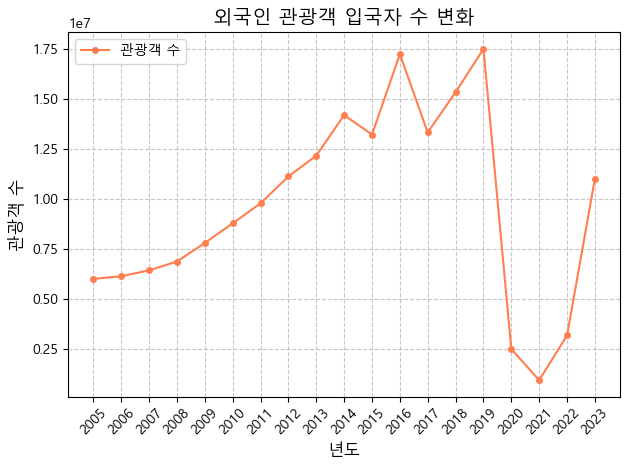

In [6]:
# 그래프 그리기
plt.plot(entrance_data['년도'], entrance_data['관광객수'], marker='o', markersize = '4', linestyle='-', color='coral', label='관광객 수')

# x 축에 모든 년도 중 일정 간격으로 라벨을 표시
plt.xticks(entrance_data['년도'], rotation=45)

# 그리드 추가
plt.grid(True, linestyle='--', alpha=0.7)

# 그래프 제목과 축 라벨 지정
plt.title('외국인 관광객 입국자 수 변화', fontsize=14)
plt.xlabel('년도', fontsize=12)
plt.ylabel('관광객 수', fontsize=12)

# 범례 추가
plt.legend(loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()

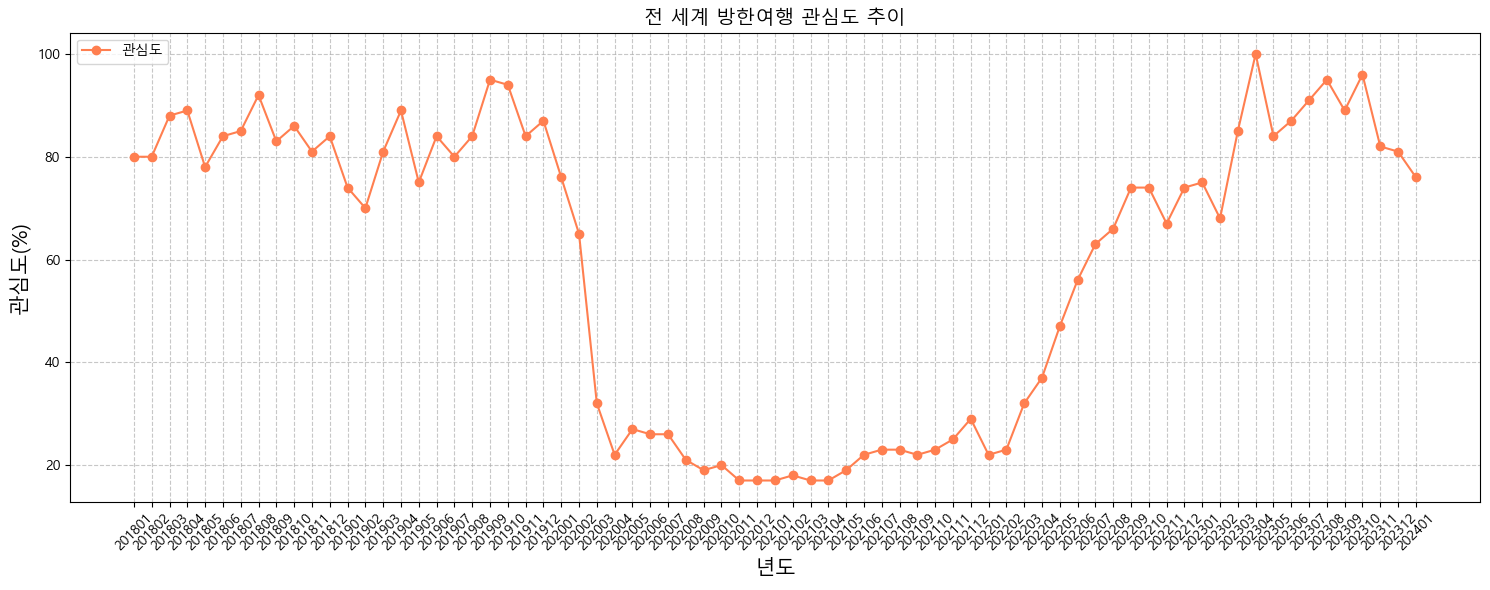

In [7]:
# Figure와 Axes 생성
fig, ax = plt.subplots(figsize=(15, 6))

# 그래프 그리기
ax.plot(preference_data['년도'], preference_data['관심도'], linestyle='-', color='coral', label='관심도',marker='o')

# x 축에 모든 년도 중 일정 간격으로 라벨을 표시
ax.set_xticks(preference_data['년도'])
ax.tick_params(axis='x', rotation=45)

# 그리드 추가
ax.grid(True, linestyle='--', alpha=0.7)

annotate_x = 201909
annotate_y = 40
annotate_text = '코로나19 발생'

# 주석을 추가
ax.annotate(annotate_text, xy=(annotate_x, annotate_y), xytext=(annotate_x - 1, annotate_y + 10),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

# 그래프 제목과 축 라벨 지정
ax.set_title('전 세계 방한여행 관심도 추이', fontsize=14)
ax.set_xlabel('년도', fontsize=15)
ax.set_ylabel('관심도(%)', fontsize=15)

# 범례 추가
ax.legend(loc='upper left')

# 그래프 표시
plt.tight_layout()
plt.show()


C:\Users\YONSAI\AppData\Local\Temp\ipykernel_12864\630187659.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['년도', '관광객수', '년도', '관심도'])
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_12864\630187659.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['년도', '관광객수', '년도', '관심도'])


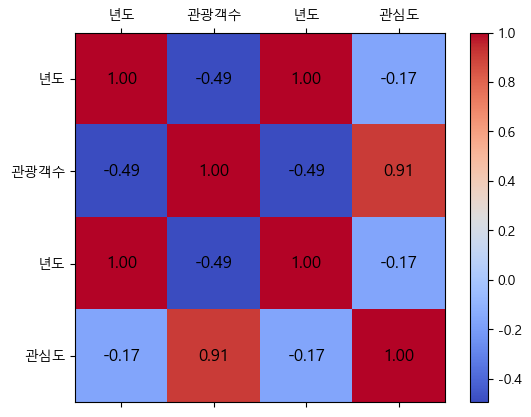

In [8]:

# 상관 분석 결과 데이터
correlation_matrix = merged_df.corr()
correlation_data = np.array([
    [1.000000, -0.494378, 1.000000, -0.166425],
    [-0.494378, 1.000000, -0.494378, 0.911409],
    [1.000000, -0.494378, 1.000000, -0.166425],
    [-0.166425, 0.911409, -0.166425, 1.000000]
])

# 그래프 그리기
fig, ax = plt.subplots()

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 설정

# 상관 분석 결과를 히트맵으로 표시
cax = ax.matshow(correlation_data, cmap='coolwarm')

# 컬럼과 로우 레이블 추가
ax.set_xticklabels([''] + ['년도', '관광객수', '년도', '관심도'])
ax.set_yticklabels([''] + ['년도', '관광객수', '년도', '관심도'])

# 각 칸의 중앙에 수치 입력
for i in range(correlation_data.shape[0]):
    for j in range(correlation_data.shape[1]):
        ax.text(j, i, f'{correlation_data[i, j]:.2f}', ha='center', va='center', color='black', fontsize = 12)


# 컬러바 추가
fig.colorbar(cax)

# 그래프 출력
plt.show()


In [9]:
merged_df.corr()

,년도,관광객수,년도,관심도
년도,1.000000,-0.494378,1.000000,-0.166425
관광객수,-0.494378,1.000000,-0.494378,0.911409
년도,1.000000,-0.494378,1.000000,-0.166425
관심도,-0.166425,0.911409,-0.166425,1.000000


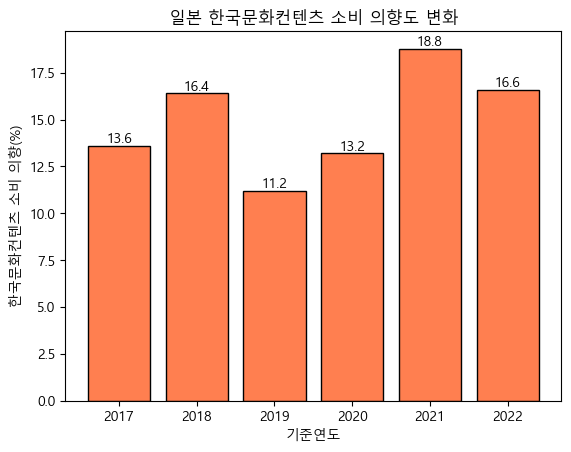

In [10]:
x = japan_Consumption.iloc[:, 0]  # 첫 번째 열을 x 축으로 설정
y = japan_Consumption.iloc[:, 1]  # 두 번째 열을 y 축으로 설정

# 막대 그래프 그리기
plt.bar(x, y, color='coral', edgecolor='black')

# 각 막대 위에 수치 표시
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')


# 그래프 타이틀 및 축 레이블 설정
plt.title('일본 한국문화컨텐츠 소비 의향도 변화')
plt.xlabel('기준연도')
plt.ylabel('한국문화컨텐츠 소비 의향(%)')

# 그래프 보여주기
plt.show()

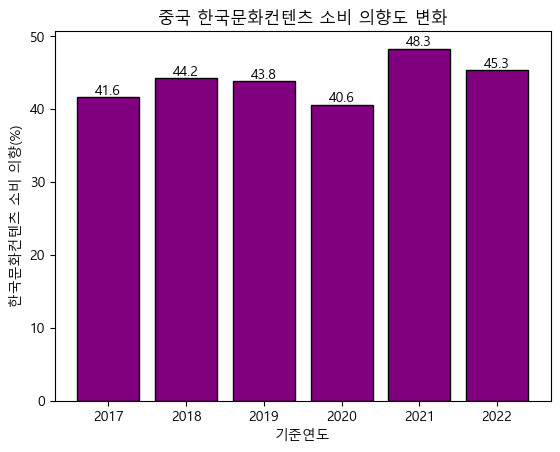

In [11]:
x = china_Consumption.iloc[:, 0]  # 첫 번째 열을 x 축으로 설정
y = china_Consumption.iloc[:, 1]  # 두 번째 열을 y 축으로 설정

# 막대 그래프 그리기
plt.bar(x, y, color='purple', edgecolor='black')

# 각 막대 위에 수치 표시
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')


# 그래프 타이틀 및 축 레이블 설정
plt.title('중국 한국문화컨텐츠 소비 의향도 변화')
plt.xlabel('기준연도')
plt.ylabel('한국문화컨텐츠 소비 의향(%)')

# 그래프 보여주기
plt.show()

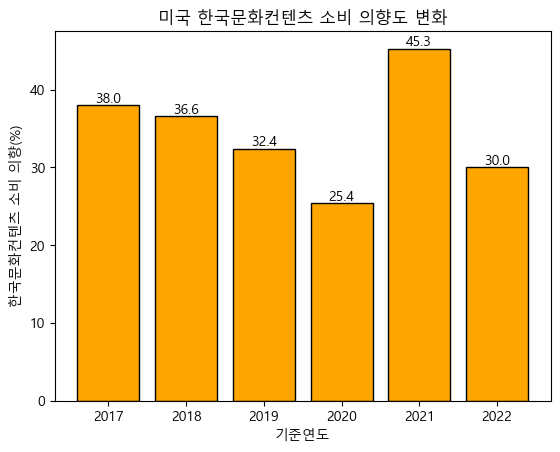

In [12]:
x = usa_Consumption.iloc[:, 0]  # 첫 번째 열을 x 축으로 설정
y = usa_Consumption.iloc[:, 1]  # 두 번째 열을 y 축으로 설정

# 막대 그래프 그리기
plt.bar(x, y, color='orange', edgecolor='black')
# yellow
# 각 막대 위에 수치 표시
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')


# 그래프 타이틀 및 축 레이블 설정
plt.title('미국 한국문화컨텐츠 소비 의향도 변화')
plt.xlabel('기준연도')
plt.ylabel('한국문화컨텐츠 소비 의향(%)')

# 그래프 보여주기
plt.show()

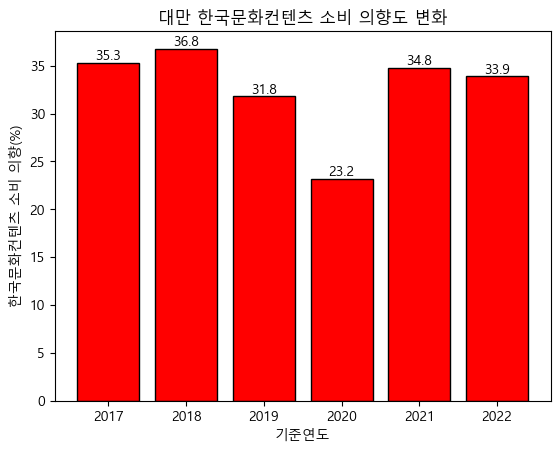

In [13]:
# 데이터프레임에서 x 축과 y 축 데이터 추출
x = tiwan_Consumption.iloc[:, 0]  # 첫 번째 열을 x 축으로 설정
y = tiwan_Consumption.iloc[:, 1]  # 두 번째 열을 y 축으로 설정

# 막대 그래프 그리기
plt.bar(x, y, color='red', edgecolor='black')

# 각 막대 위에 수치 표시
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')


# 그래프 타이틀 및 축 레이블 설정
plt.title('대만 한국문화컨텐츠 소비 의향도 변화')
plt.xlabel('기준연도')
plt.ylabel('한국문화컨텐츠 소비 의향(%)')

# 그래프 보여주기
plt.show()

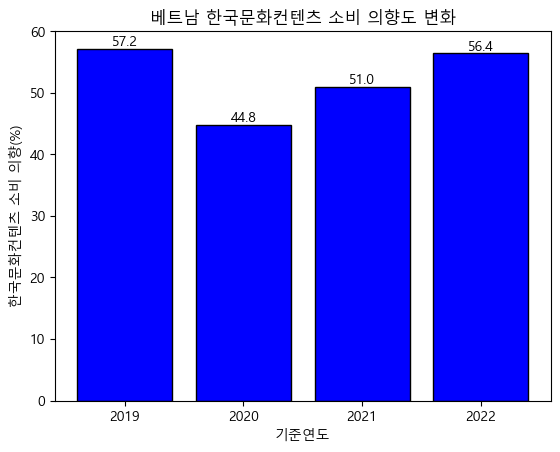

In [14]:
x = vietnam_Consumption.iloc[:, 0].astype(str)  # 첫 번째 열을 문자열로 변환하여 x 축으로 설정
y = vietnam_Consumption.iloc[:, 1]  # 두 번째 열을 y 축으로 설정

# 막대 그래프 그리기
plt.bar(x, y, color='blue', edgecolor='black')

# 각 막대 위에 수치 표시
for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

# 그래프 타이틀 및 축 레이블 설정
plt.title('베트남 한국문화컨텐츠 소비 의향도 변화')
plt.xlabel('기준연도')
plt.ylabel('한국문화컨텐츠 소비 의향(%)')

# 그래프 보여주기
plt.show()


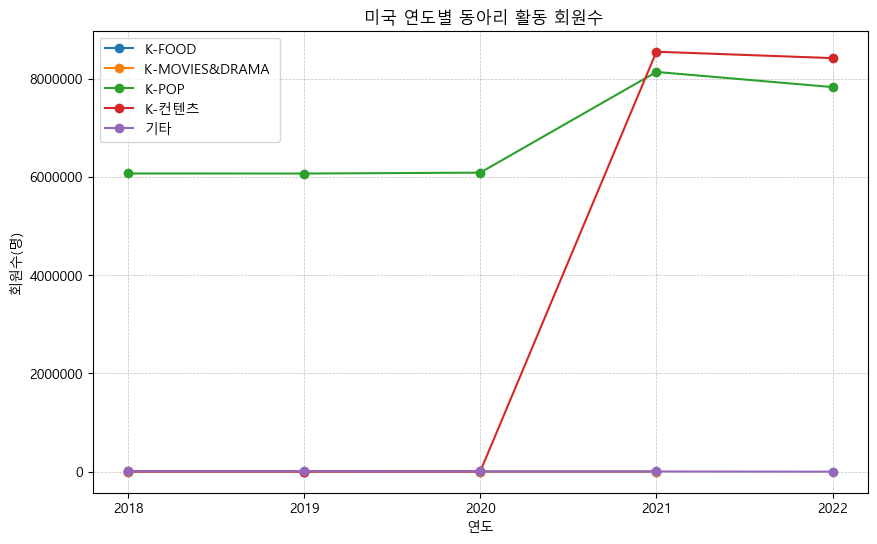

In [15]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 연도와 세부 활동현황을 기준으로 그룹화된 데이터를 반복하여 그래프를 그립니다.
for activity, group in usa_club.groupby('세부 활동현황'):
    plt.plot(group['연도'], group['회원수'], label=activity,marker='o')  # x축: 연도, y축: 회원수, 범례: 세부 활동현황
# plt.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# 그래프 제목과 축 레이블 설정
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title(' 미국 연도별 동아리 활동 회원수')
plt.xlabel('연도')
plt.ylabel('회원수(명)')
# 범례 표시
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
# 그래프 출력
plt.show()

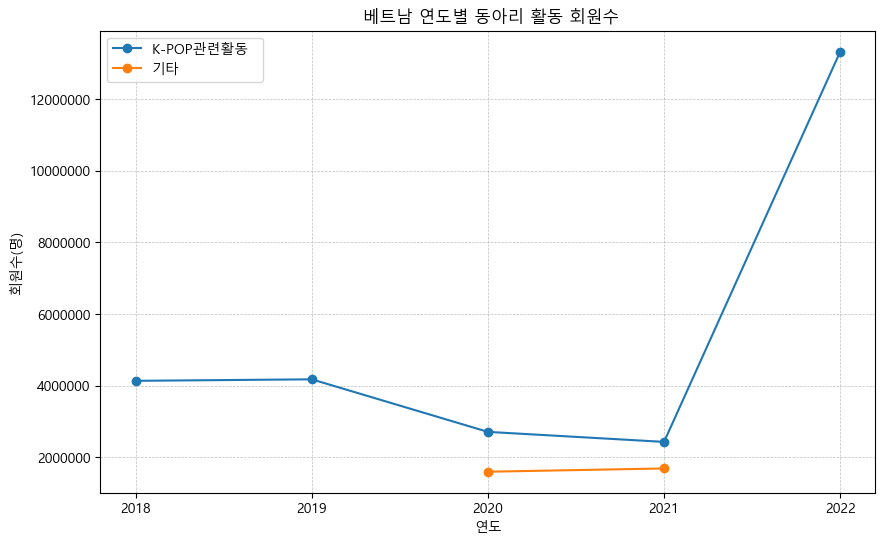

In [16]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 연도와 세부 활동현황을 기준으로 그룹화된 데이터를 반복하여 그래프를 그립니다.
for activity, group in vietnam_club.groupby('세부 활동현황'):
    plt.plot(group['연도'], group['회원수'], label=activity,marker='o')  # x축: 연도, y축: 회원수, 범례: 세부 활동현황
# plt.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# 그래프 제목과 축 레이블 설정
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title(' 베트남 연도별 동아리 활동 회원수')
plt.xlabel('연도')
plt.ylabel('회원수(명)')
# 범례 표시
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
# 그래프 출력
plt.show()

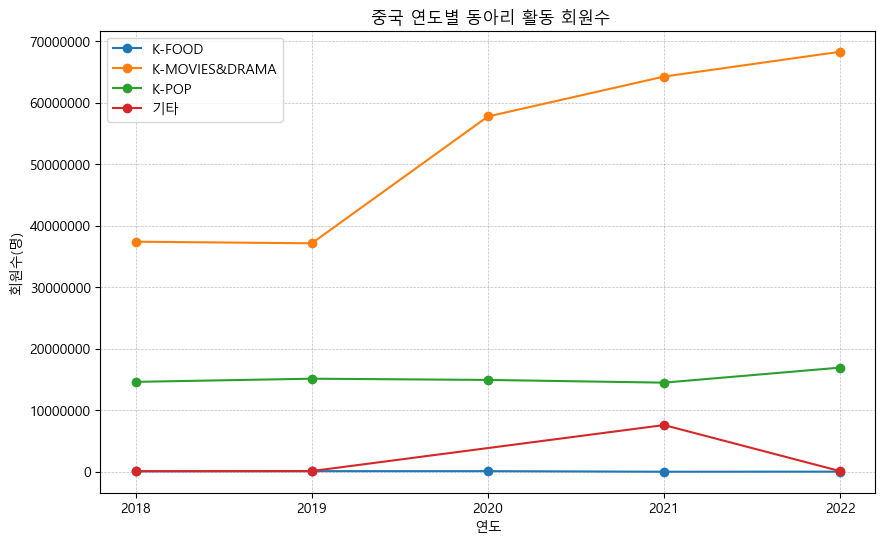

In [17]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 연도와 세부 활동현황을 기준으로 그룹화된 데이터를 반복하여 그래프를 그립니다.
for activity, group in china_club.groupby('세부 활동현황'):
    plt.plot(group['연도'], group['회원수'], label=activity,marker='o')  # x축: 연도, y축: 회원수, 범례: 세부 활동현황
# plt.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# 그래프 제목과 축 레이블 설정
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title(' 중국 연도별 동아리 활동 회원수')
plt.xlabel('연도')
plt.ylabel('회원수(명)')
# 범례 표시
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
# 그래프 출력
plt.show()

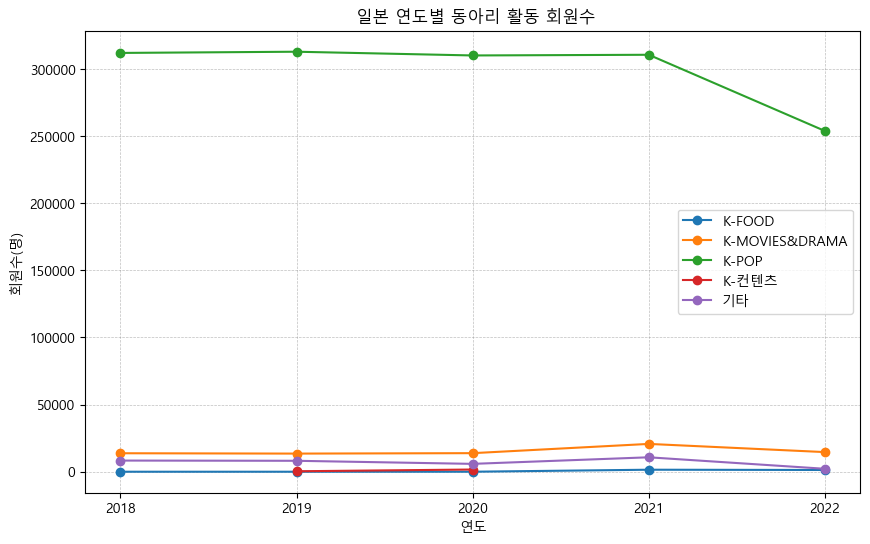

In [18]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 연도와 세부 활동현황을 기준으로 그룹화된 데이터를 반복하여 그래프를 그립니다.
for activity, group in japan_club.groupby('세부 활동현황'):
    plt.plot(group['연도'], group['회원수'], label=activity,marker='o')  # x축: 연도, y축: 회원수, 범례: 세부 활동현황
# plt.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# 그래프 제목과 축 레이블 설정
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title(' 일본 연도별 동아리 활동 회원수')
plt.xlabel('연도')
plt.ylabel('회원수(명)')
# 범례 표시
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
# 그래프 출력
plt.show()

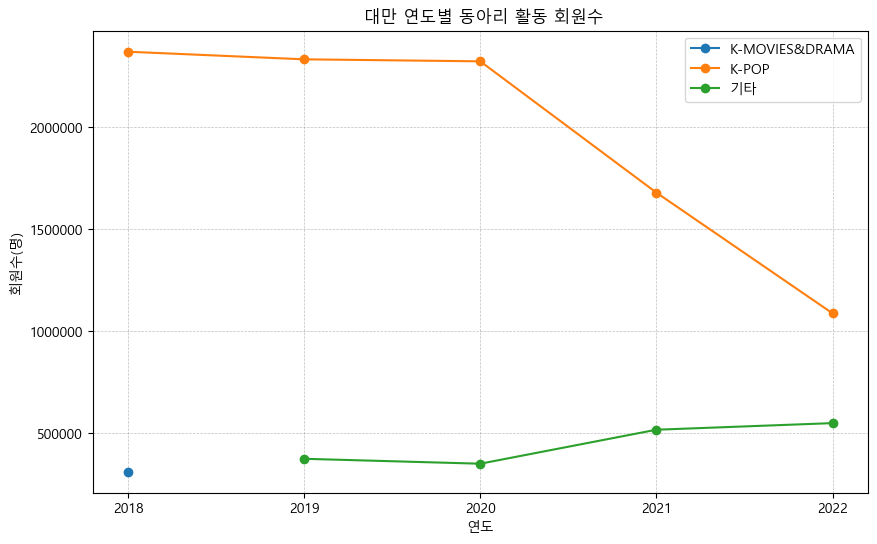

In [19]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

# 연도와 세부 활동현황을 기준으로 그룹화된 데이터를 반복하여 그래프를 그립니다.
for activity, group in tiwan_club.groupby('세부 활동현황'):
    plt.plot(group['연도'], group['회원수'], label=activity,marker='o')  # x축: 연도, y축: 회원수, 범례: 세부 활동현황
# plt.get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
# 그래프 제목과 축 레이블 설정
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
plt.title(' 대만 연도별 동아리 활동 회원수')
plt.xlabel('연도')
plt.ylabel('회원수(명)')
# 범례 표시
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
# 그래프 출력
plt.show()

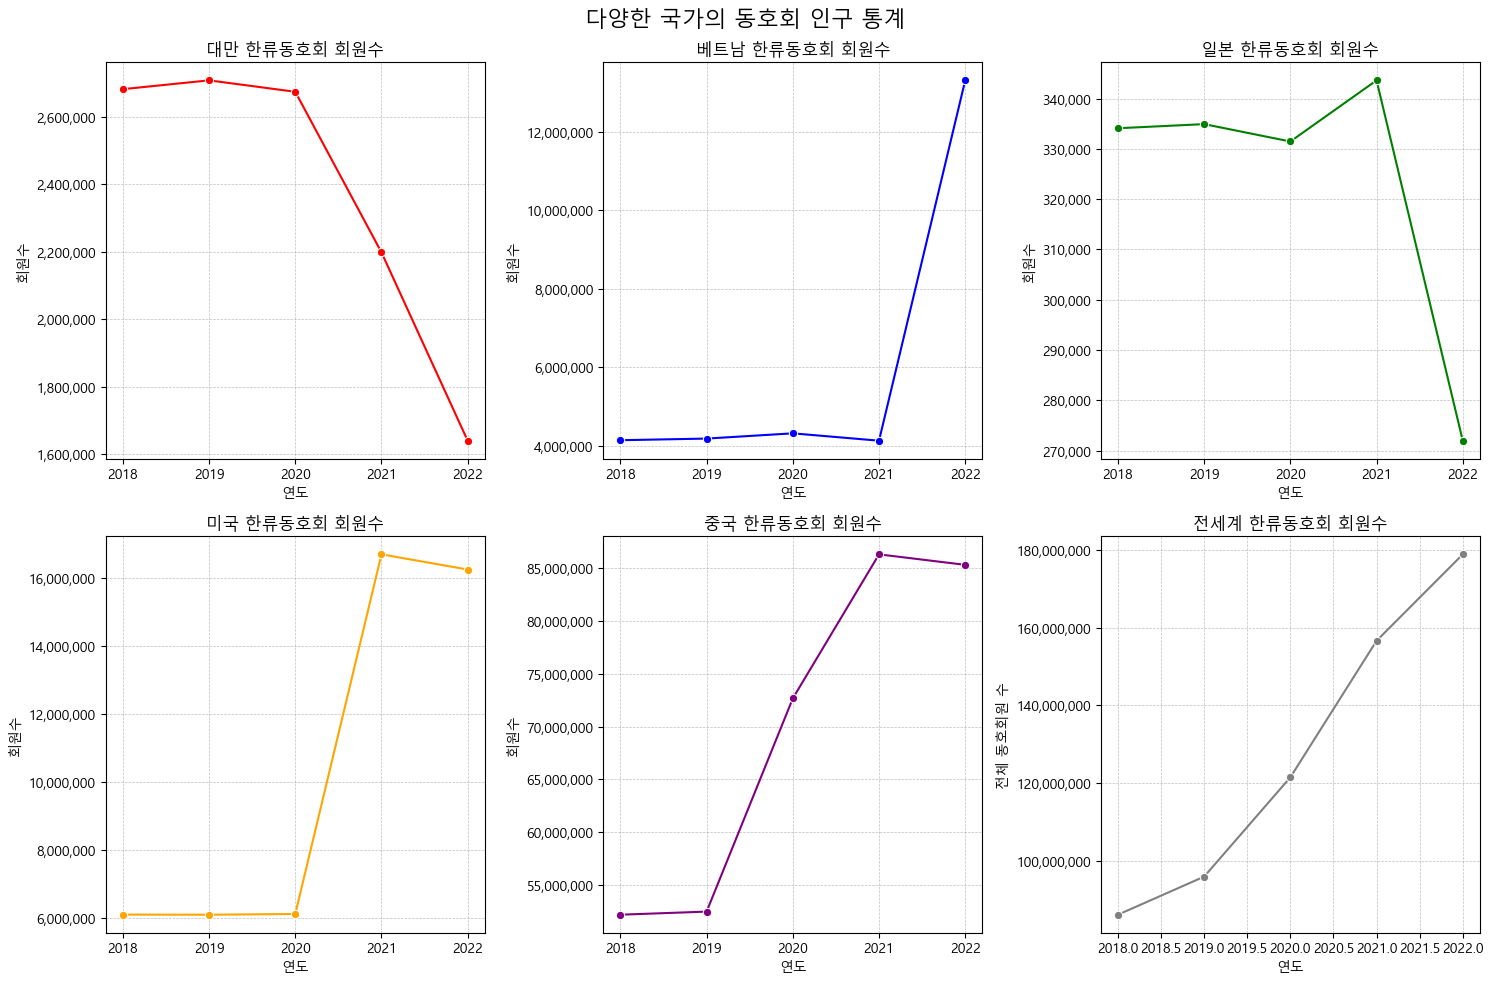

In [20]:
colors = {'대만': 'red', '베트남': 'blue', '일본': 'green', '미국': 'orange', '중국': 'purple', '전세계': 'gray'}

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)
sns.lineplot(x='연도',y='회원수',data=tiwan_people, ax=ax1,marker='o' ,color=colors['대만'])
ax1.set_title("대만 한류동호회 회원수")
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(x='연도',y='회원수',data=vietnam_people, ax=ax2,marker='o',color=colors['베트남'])
ax2.set_title("베트남 한류동호회 회원수")
ax2.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(x='연도',y='회원수',data=japan_people, ax=ax3,marker='o',color=colors['일본'])
ax3.set_title("일본 한류동호회 회원수")
ax3.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(x='연도',y='회원수',data=usa_people, ax=ax4,marker='o',color=colors['미국'])
ax4.set_title("미국 한류동호회 회원수")
ax4.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(x='연도',y='회원수',data=china_people, ax=ax5,marker='o',color=colors['중국'])
ax5.set_title("중국 한류동호회 회원수")
ax5.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax5.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(x='연도',y='전체 동호회원 수',data=total,ax=ax6,marker='o',color=colors['전세계'])
ax6.set_title("전세계 한류동호회 회원수")
ax6.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax6.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
fig.suptitle('다양한 국가의 동호회 인구 통계', fontsize=16)
plt.tight_layout()
plt.show()


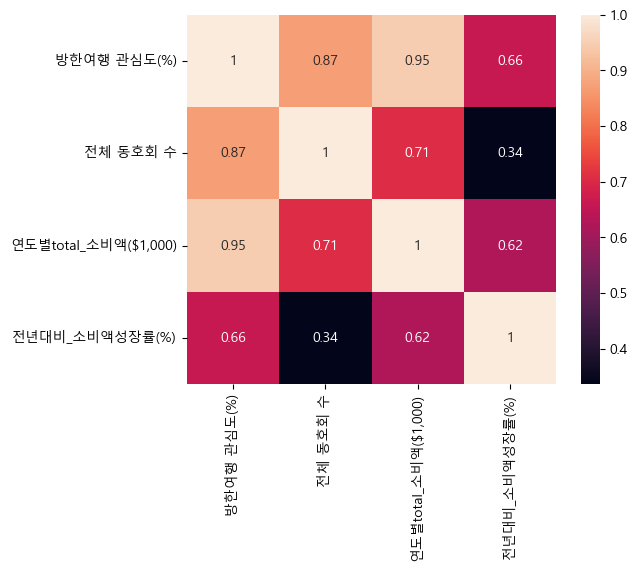

In [21]:
sns.heatmap(data=last.corr(),square=True,annot=True,cbar=True)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

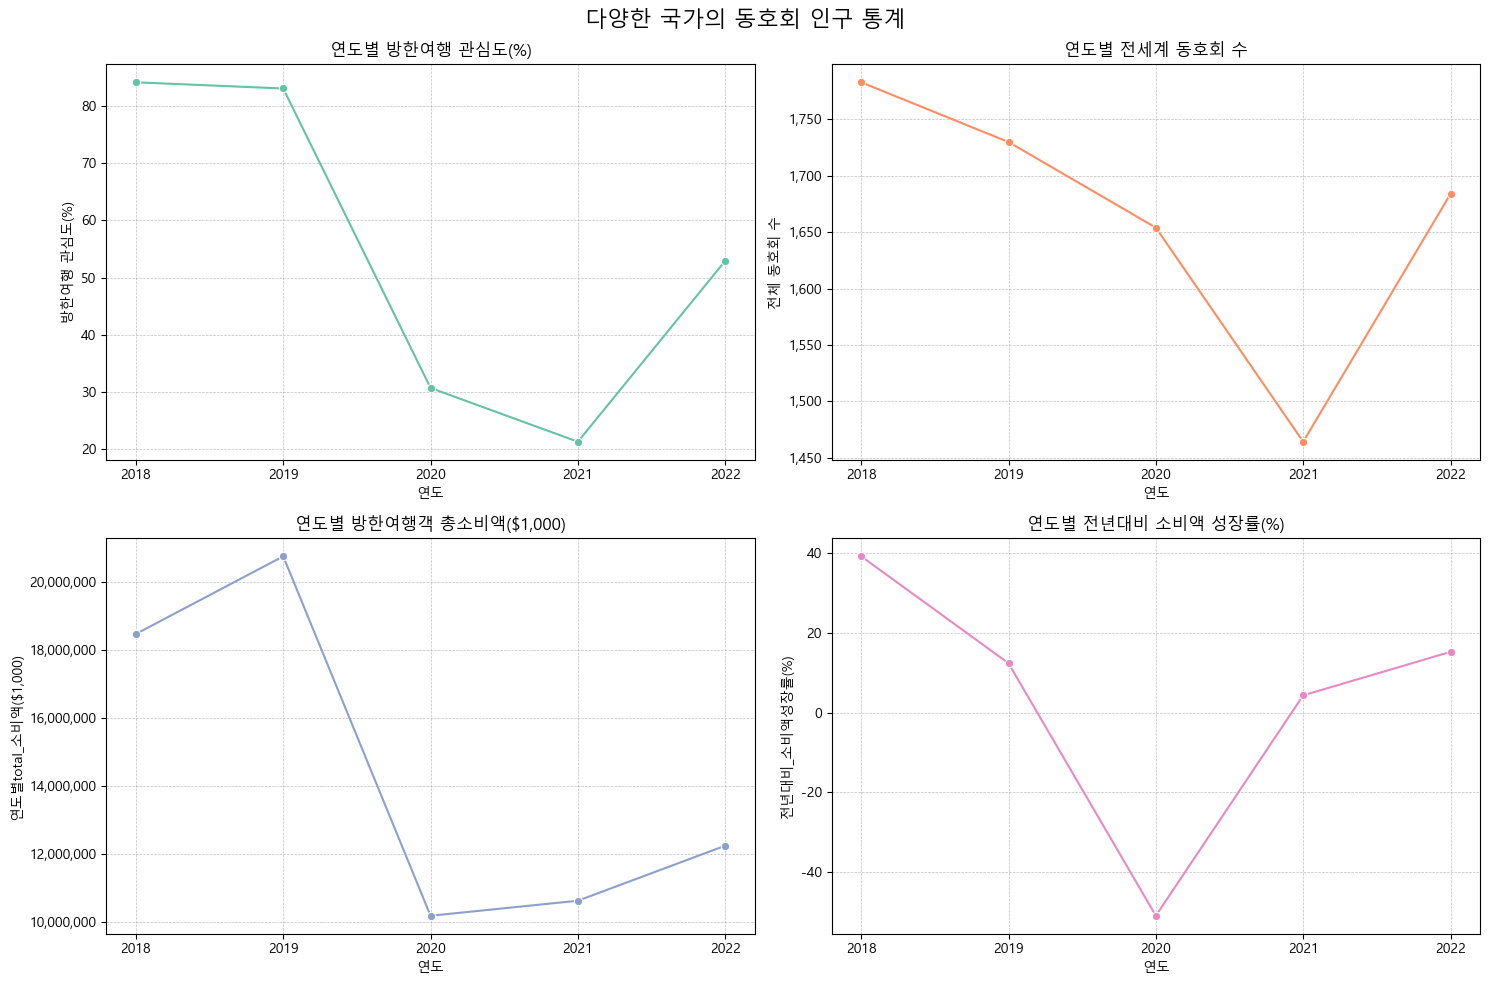

In [22]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 그래프에 적용할 색상 팔레트 정의
colors = sns.color_palette("Set2")

sns.lineplot(x='연도',y='방한여행 관심도(%)',data=last2, ax=ax1, marker='o', color=colors[0])
ax1.set_title("연도별 방한여행 관심도(%)")
ax1.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(x='연도',y='전체 동호회 수',data=last2, ax=ax2, marker='o', color=colors[1])
ax2.set_title("연도별 전세계 동호회 수")
ax2.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(x='연도',y='연도별total_소비액($1,000)',data=last2, ax=ax3, marker='o', color=colors[2])
ax3.set_title("연도별 방한여행객 총소비액($1,000)")
ax3.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

sns.lineplot(x='연도',y='전년대비_소비액성장률(%)',data=last2, ax=ax4, marker='o', color=colors[3])
ax4.set_title("연도별 전년대비 소비액 성장률(%)")
ax4.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
ax4.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

fig.suptitle('다양한 국가의 동호회 인구 통계', fontsize=16)
plt.tight_layout()
plt.show()

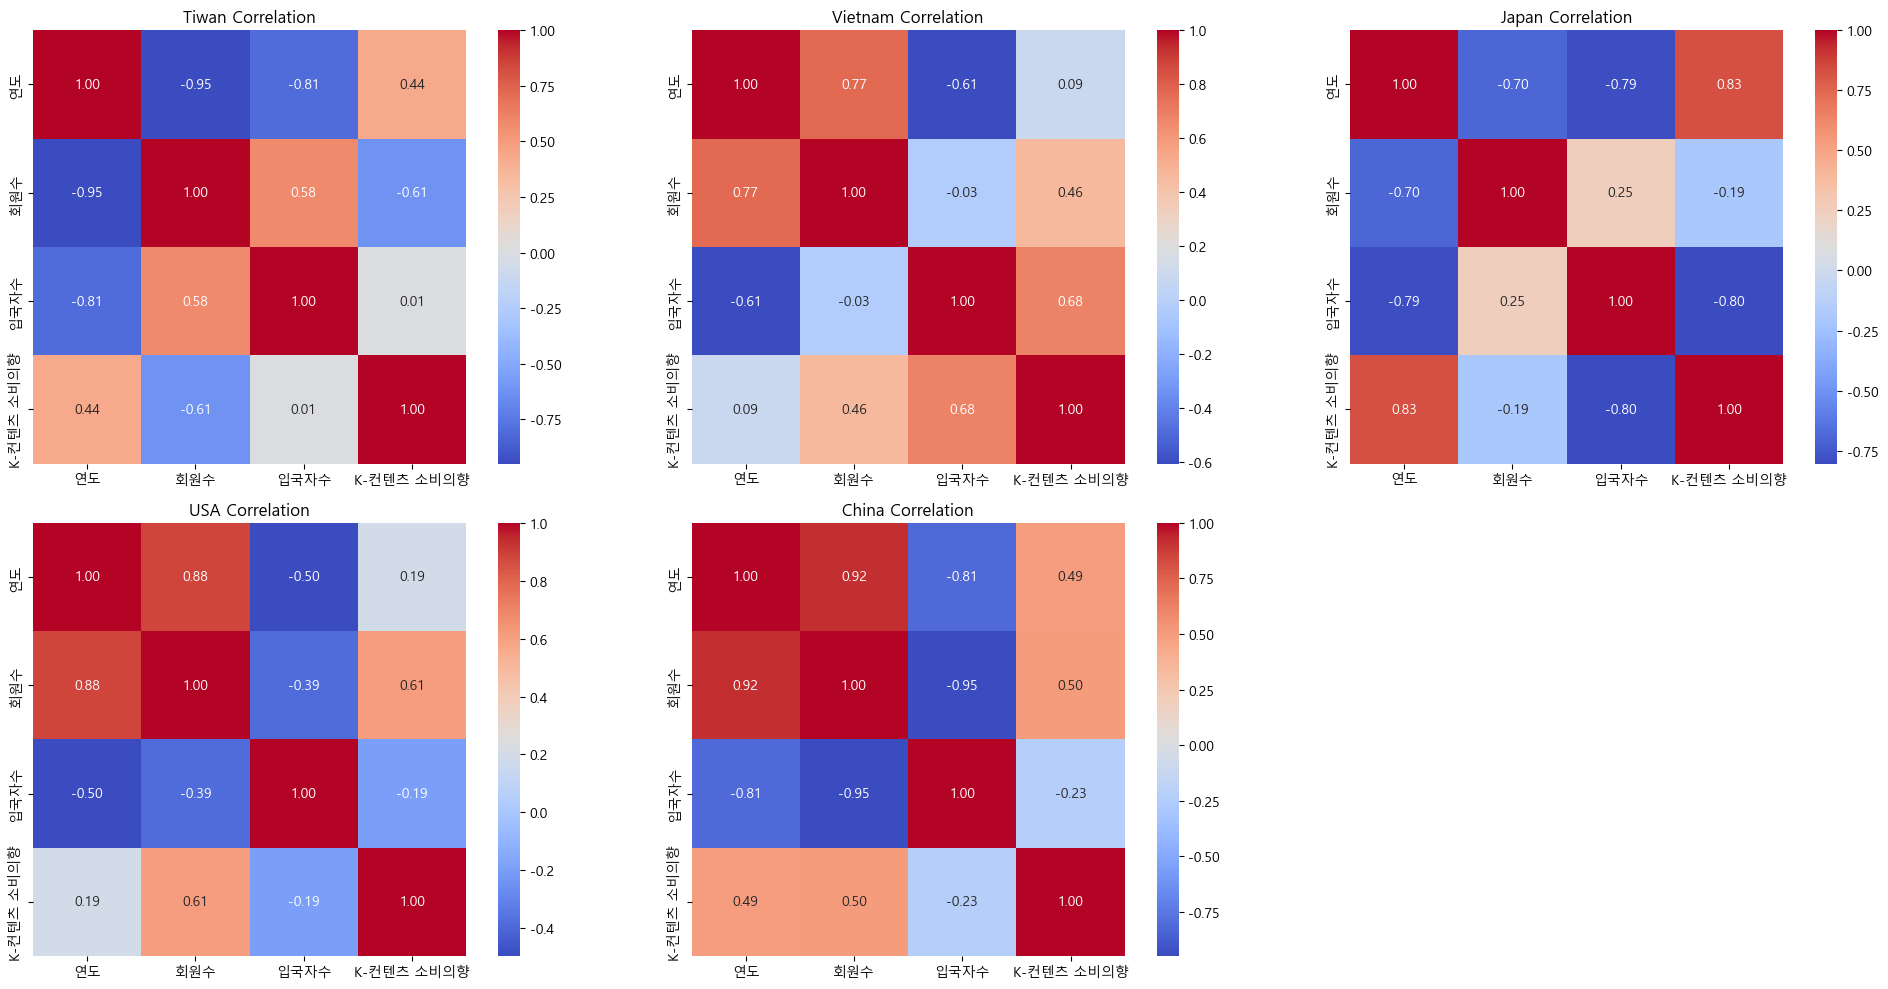

In [23]:
# 그래프의 크기 설정
plt.figure(figsize=(20, 10))

# 서브플롯에 히트맵 그리기
plt.subplot(2, 3, 1)
plt.title('Tiwan Correlation')
sns.heatmap(merged_tiwan_total.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.subplot(2, 3, 2)
plt.title('Vietnam Correlation')
sns.heatmap(merged_vietnam_total.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.subplot(2, 3, 3)
plt.title('Japan Correlation')
sns.heatmap(merged_japan_total.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.subplot(2, 3, 4)
plt.title('USA Correlation')
sns.heatmap(merged_usa_total.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.subplot(2, 3, 5)
plt.title('China Correlation')
sns.heatmap(merged_china_total.corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)

# 서브플롯간의 간격 조정
plt.tight_layout()

# 그래프 출력
plt.show()

## 결론


방한여행 관심도(%)와 관광객수, 전체 동호회 수, 연도별 총 소비액($1,000),

전년 대비 소비액 성장률 간의 상관관계 계수는 각각 0.911409, 0.869889, 0.946445, 0.661490으로 양의 상관관계를 보입니다.

이는 방한여행 관심도가 증가할수록 관광객수, 동호회 수, 총 소비액, 그리고 전년 대비 소비액 성장률이 함께 증가하는 경향을 보인다는 것을 의미합니다.

방한여행 관심도가 높아질수록 관광 수요 및 소비 증가로 이어질 가능성이 높으며,

 이를 통해 K-컨텐츠를 효과적으로 활용하여 관광 산업을 발전시킬 수 있습니다.